# PRML

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from itertools import combinations_with_replacement
import sympy
sympy.init_printing()

### Exercise 1.15
The $M$-th order term for a $D$-dimensional polynomial is given by
$$
    \sum_{i_1=1}^D \sum_{i_2=1}^D \dots \sum_{i_M=1}^D w_{i_1,i_2,\ldots,i_M}x_{i_1}x_{i_2}\ldots x_{i_M}
$$
Show that we can rewrite the last expresion by removing redundant terms in the form:
$$
    \sum_{i_1=1}^D \sum_{i_2=1}^{i_1} \dots \sum_{i_M=1}^{i_{M-1}} \tilde w_{i_1,i_2,\ldots,i_M}x_{i_1}x_{i_2}\ldots x_{i_M}
$$

Note: the number of independent parameters is significantly fewer due to the many interchange symmetries of the factor $x_{i_1}x_{i_2}\ldots x_{i_M}$

In [2]:
terms = range(1, 4)
i, j, k = symbols("i j k", integer=True)
what = IndexedBase("\hat{w}")
x = IndexedBase("x")

In [3]:
def extract(iterable: list, elements: list) -> list:
    """
    Extract and convert elements from a multi-level
    list into a 1D list
    """
    for el in iterable:
        if type(el) == list:
            extract(el, elements)
        else:
            elements.append(el)
    return elements

In [4]:
def term2d(i, j): return Indexed("\hat{w}", i, j) * Indexed("x", i) * Indexed("x", j)
def term3d(i, j, k): return Indexed("\hat{w}", i, j, k) * Indexed("x", i) * Indexed("x", j) * Indexed("x", k)

#### For $D=2$, $M=3$

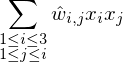

In [5]:
Sum(term2d(i, j), (i, 1, 3), (j, 1, i))

In [6]:
elements = [[term2d(i, j) for j in range(1, i + 1)] for i in terms]
simple_term = sum(extract(elements, []))
simple_term

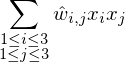

In [17]:
Sum(term2d(i, j), (i, 1, 3), (j, 1, 3))

In [8]:
full_term =  summation(term2d(i, j), (i, 1, 3), (j, 1, 3))
full_term

In [9]:
replacement = {what[x, y]: what[y, x] for x, y in ([2, 1], [3, 1], [3, 2])}
full_term.xreplace(replacement) 

In [10]:
collect(full_term, [x[1]*x[2], x[1] * x[3], x[2] * x[3]])

-------

#### For $D=3$, $M=3$

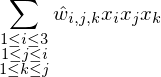

In [11]:
Sum(term3d(i, j, k), (i, 1, 3), (j, 1, i), (k, 1, j))

In [12]:
elements = [[[term3d(i, j, k) for k in range(1, j + 1)] for j in range(1 + i)] for i in terms]
simple_term = sum(extract(elements, []))
simple_term

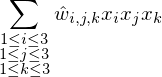

In [13]:
Sum(term3d(i, j, k), (i, 1, 3), (j, 1, 3), (k, 1, 3))

In [14]:
full_term = summation(term3d(i, j, k), (i, 1, 3), (j, 1, 3), (k, 1, 3))
full_term

In [16]:
groupping = [x[a] *  x[b] * x[c] for a, b, c in combinations_with_replacement([1, 2, 3], r=3)]
collect(full_term, groupping, exact=True)

### Exercise 1.18
By considering
$$
    \prod_{i=1}^D \int_{-\infty}^{\infty}e^{-x_i^2} dx_i = S_D \int_{0}^\infty e^{-r^2}r^{D-1}dr
$$

We can show that the surface area $S_D$ and the volume $V_D$ of a unit radius in $D$ dimensions is given by

$$
    S_D = \frac{2\pi^{D/2}}{\Gamma(D/2)}
$$

$$
    V_D = \frac{S_D}{D}
$$

In [6]:
from scipy.special import gamma

D = np.linspace(0.1, 20, 1000)
Sd = 2 * np.pi * D / gamma(D / 2)
Vd = Sd / D

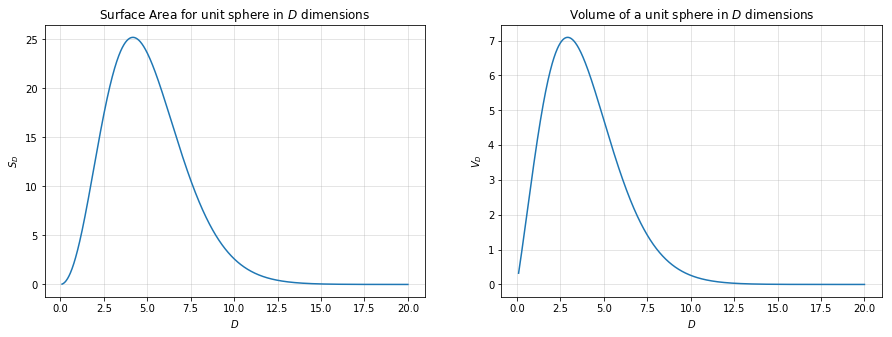

In [36]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1)
ax.plot(D, Sd)
ax.set_title("Surface Area for unit sphere in $D$ dimensions")
ax.set_xlabel("$D$")
ax.set_ylabel("$S_D$")
ax.grid(alpha=0.4)

ax = fig.add_subplot(1, 2, 2)
ax.plot(D, Vd)
ax.set_title("Volume of a unit sphere in $D$ dimensions")
ax.set_xlabel("$D$")
ax.set_ylabel("$V_D$")
ax.grid(alpha=0.4)

### Exercise 1.20
By considering
$$
    p(\mathbf{x}) = \frac{1}{\left(2\pi\sigma^2\right)^{D/2}}\exp{\left(-\frac{||\mathbf{x}||^2}{2\sigma^2}\right)}
$$

Show that the integralof the probability density over a thin shell of radius $r$ and thickness $\varepsilon$, where $\varepsilon \ll 1$, is given by $p(r)\varepsilon$ where

$$
    p(r) = \frac{S_Dr^{D-1}}{\left(2\pi\sigma^2\right)^{D/2}}\exp\left(-\frac{-r^2}{2\sigma^2}\right)
$$

In [10]:
from sympy import cos, sin
t1, t2, t3, r = sympy.symbols("theta1 theta2 theta3 r")
x1 = r * cos(t1)
x2 = r * sin(t1) * cos(t2)
x3 = r * sin(t1) * sin(t2) * cos(t3)
x4 = r * sin(t1) * sin(t2) * sin(t3)

In [20]:
X2 = sum([x**2 for x in [x1, x2, x3, x4]])
X2

In [21]:
X2.simplify()